In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/Users/apple/Downloads/My Files/My File/NLP_TOP_MOVIES/top_movies.csv')

In [5]:
df.head()

,movie_name,genre,description
0,The Shawshank Redemption,"Drama, Crime",Imprisoned in the 1940s for the double murder ...
1,The Godfather,"Drama, Crime","Spanning the years 1945 to 1955, a chronicle o..."
2,The Godfather Part II,"Drama, Crime",In the continuing saga of the Corleone crime f...
3,Schindler's List,"Drama, History, War",The true story of how businessman Oskar Schind...
4,12 Angry Men,Drama,The defense and the prosecution have rested an...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9420 entries, 0 to 9419
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_name   9420 non-null   object
 1   genre        9417 non-null   object
 2   description  9420 non-null   object
dtypes: object(3)
memory usage: 220.9+ KB


In [7]:
print(df.isnull().sum())
df = df.dropna(subset=['genre'])


movie_name     0
genre          3
description    0
dtype: int64


In [8]:
from collections import Counter

genre_counts = Counter()
for genres in df['genre']:
    for genre in genres.split(', '):
        genre_counts[genre] += 1


In [9]:
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
genre_df.head(10)

,Genre,Count
0,Drama,4423
9,Comedy,3390
8,Thriller,2540
7,Action,2193
10,Romance,1654
11,Adventure,1587
1,Crime,1507
14,Horror,1276
13,Science Fiction,1122
5,Family,1076


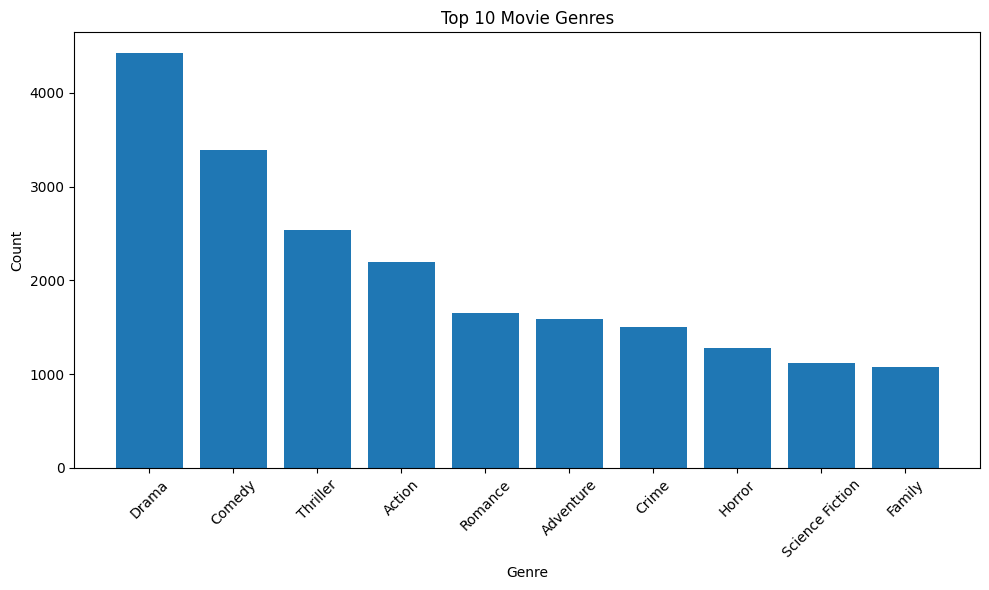

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(genre_df['Genre'][:10], genre_df['Count'][:10])
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a bag-of-words model (excluding stopwords)
vectorizer = CountVectorizer(stop_words='english', max_features=30)
X = vectorizer.fit_transform(df['description'])



In [12]:
keywords_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_keywords = keywords_df.sum().sort_values(ascending=False)
print(top_keywords)

life          1586
new           1298
young         1258
world         1091
family        1046
man            940
love           743
old            707
woman          641
finds          631
time           625
years          618
home           587
friends        578
year           565
help           561
father         559
school         556
story          552
soon           513
lives          513
war            509
wife           497
town           494
girl           470
way            468
mysterious     463
group          460
city           457
high           456
dtype: int64


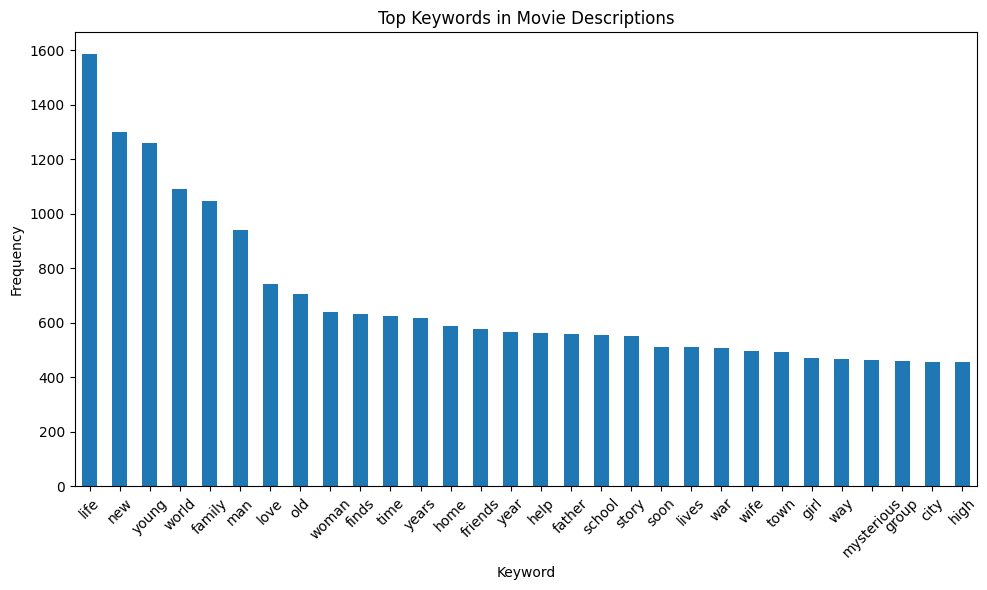

In [13]:
top_keywords.plot(kind='bar', figsize=(10, 6))
plt.title('Top Keywords in Movie Descriptions')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'])


In [19]:
from sklearn.cluster import KMeans
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)


In [22]:
# Reduce TF-IDF vectors to 2D for plotting
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

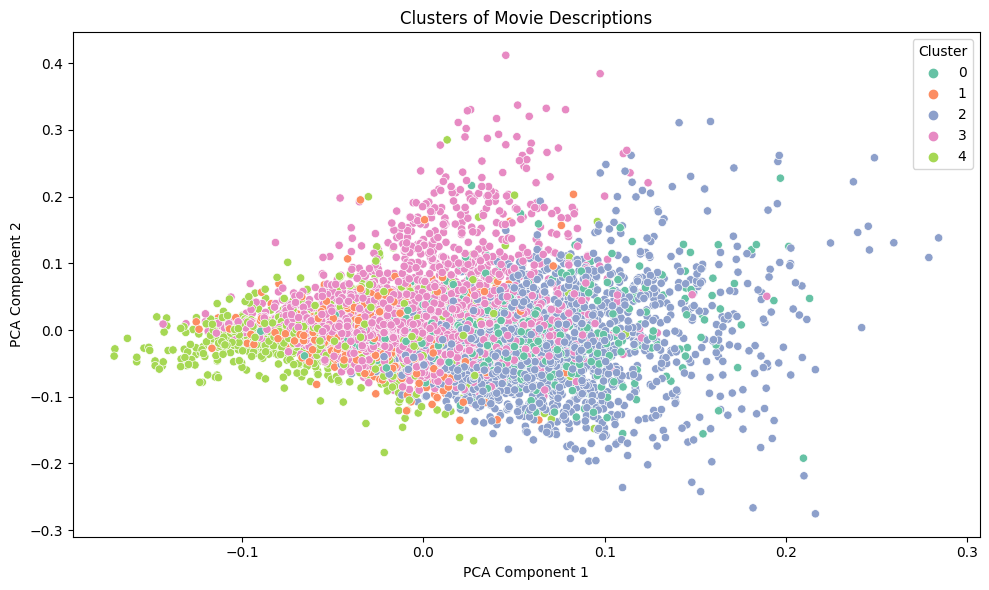

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1],
                hue=df['cluster'], palette='Set2')
plt.title('Clusters of Movie Descriptions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
# Reduce TF-IDF vectors to 2D for plotting
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())


In [24]:

for cluster_num in range(num_clusters):
    print(f"\n🎬 Sample movies from Cluster {cluster_num}:")
    sample_movies = df[df['cluster'] == cluster_num]['movie_name'].head(5).tolist()
    for title in sample_movies:
        print(f" - {title}")
# Display a few movie titles from each cluster
for cluster_num in range(num_clusters):
    print(f"\n🎬 Sample movies from Cluster {cluster_num}:")
    sample_movies = df[df['cluster'] == cluster_num]['movie_name'].head(5).tolist()
    for title in sample_movies:
        print(f" - {title}")



🎬 Sample movies from Cluster 0:
 - The Lord of the Rings: The Fellowship of the Ring
 - The Legend of Hei
 - Modern Times
 - We All Loved Each Other So Much
 - The Boy, the Mole, the Fox and the Horse

🎬 Sample movies from Cluster 1:
 - Se7en
 - The Silence of the Lambs
 - Memento
 - Investigation of a Citizen Above Suspicion
 - Vertigo

🎬 Sample movies from Cluster 2:
 - The Godfather
 - The Godfather Part II
 - 12 Angry Men
 - Spirited Away
 - Dilwale Dulhania Le Jayenge

🎬 Sample movies from Cluster 3:
 - The Shawshank Redemption
 - The Dark Knight
 - The Green Mile
 - Pulp Fiction
 - Your Name.

🎬 Sample movies from Cluster 4:
 - Schindler's List
 - The Lord of the Rings: The Return of the King
 - The Good, the Bad and the Ugly
 - Grave of the Fireflies
 - Life Is Beautiful

🎬 Sample movies from Cluster 0:
 - The Lord of the Rings: The Fellowship of the Ring
 - The Legend of Hei
 - Modern Times
 - We All Loved Each Other So Much
 - The Boy, the Mole, the Fox and the Horse

🎬 Sampl

In [26]:
print("\nTop Keywords per Cluster:")


terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    print(f"\n🔹 Cluster {i}:")
    # Get positional indices for the cluster
    cluster_pos_indices = df.index.get_indexer(df[df['cluster'] == i].index)
    cluster_tfidf = tfidf_matrix[cluster_pos_indices].mean(axis=0)
    top_indices = cluster_tfidf.A1.argsort()[-10:][::-1]  # top 10
    top_terms = [terms[ind] for ind in top_indices]
    print("Top terms:", ', '.join(top_terms))



Top Keywords per Cluster:

🔹 Cluster 0:
Top terms: home, couple, family, new, young, life, returns, house, wife, married

🔹 Cluster 1:
Top terms: police, killer, detective, murder, serial, agent, case, cop, fbi, officer

🔹 Cluster 2:
Top terms: young, family, old, woman, year, life, father, man, mother, girl

🔹 Cluster 3:
Top terms: life, new, school, friends, love, story, man, time, high, group

🔹 Cluster 4:
Top terms: world, war, ii, life, new, story, young, man, save, mission


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [28]:
df['main_genre'] = df['genre'].apply(lambda x: x.split(',')[0])

# TF-IDF vectorization
X = tfidf_vectorizer.fit_transform(df['description'])
y = df['main_genre']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression classifier
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                 precision    recall  f1-score   support

         Action       0.41      0.56      0.47       243
      Adventure       0.32      0.06      0.10       112
      Animation       0.49      0.16      0.24       116
         Comedy       0.35      0.58      0.44       352
          Crime       0.35      0.07      0.12        84
          Drama       0.37      0.63      0.47       446
         Family       0.00      0.00      0.00        50
        Fantasy       0.00      0.00      0.00        33
        History       0.00      0.00      0.00        13
         Horror       0.49      0.40      0.44       153
          Music       0.00      0.00      0.00        10
        Mystery       0.00      0.00      0.00        26
        Romance       0.00      0.00      0.00        59
Science Fiction       0.57      0.08      0.14        51
       TV Movie       0.00      0.00      0.00         1
       Thriller       0.75      0.03      0.05       107
      

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [29]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, hamming_loss

# Split genres into lists
df['genre_list'] = df['genre'].apply(lambda x: x.split(', '))

# Encode multi-label targets
mlb = MultiLabelBinarizer()
y_multi = mlb.fit_transform(df['genre_list'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y_multi, test_size=0.2, random_state=42)

# Train multi-label classifier
multi_clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
multi_clf.fit(X_train, y_train)

# Predict
y_pred = multi_clf.predict(X_test)

# Evaluate
print("\nMulti-label Genre Classification Evaluation:")
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("Subset Accuracy:", accuracy_score(y_test, y_pred))



Multi-label Genre Classification Evaluation:
Hamming Loss: 0.12305378627034678
Subset Accuracy: 0.10244161358811041


In [30]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_similar_movies(movie_title, top_n=5):
    if movie_title not in df['movie_name'].values:
        print("Movie not found in the dataset.")
        return
    
    idx = df[df['movie_name'] == movie_title].index[0]
    movie_vec = tfidf_matrix[idx]
    sim_scores = cosine_similarity(movie_vec, tfidf_matrix).flatten()
    sim_indices = sim_scores.argsort()[-top_n-1:-1][::-1]  
    
    print(f"\n📽️ Movies similar to '{movie_title}':")
    for i in sim_indices:
        print(f" - {df.iloc[i]['movie_name']}")



In [31]:
recommend_similar_movies("The Godfather")


📽️ Movies similar to 'The Godfather':
 - Blood Ties
 - The Godfather Part II
 - Proud Mary
 - Sansho the Bailiff
 - Joe


In [32]:
recommend_similar_movies("The Dark Knight")


📽️ Movies similar to 'The Dark Knight':
 - Batman: The Long Halloween, Part Two
 - Batman: The Long Halloween, Part One
 - The Dark Knight Rises
 - Batman
 - Batman: The Killing Joke


In [34]:
recommend_similar_movies("Inception")


📽️ Movies similar to 'Inception':
 - Pitch Perfect 2
 - Cypher
 - Mission: Impossible - Rogue Nation
 - Stowaway
 - The Wrong Missy
